In [ ]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

     |████████████████████████████████| 10.1MB 14.0MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=0d7a5e0dd577bf95000f03c0f663f5379325b15113fc094235955a05b1abe15f
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 983kB 12.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=ee90055a8e56eb4ba155be18e4c887e6b7f778ba3edbd8e8a38f0293ff736ff0
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
consumerKey = "qh0PEi9LGbFqrq0bEVx10Eg2d"
consumerSecret = "hoAuH6TQkhLFSBgV50IlwMbYIgZiRr0l6dz6dZHXWcZu8KRIYx"
accessToken = "1403975818217357326-dtrPf2smIz8TptyRXpM3faTCV89HN2"
accessTokenSecret = "9vgGQEW532KDDPOrWsGS89JjGmnoT7nu7rN84az99g2pL"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text) #nltk fn to analyze tweets
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: england
Please enter how many tweets to analyze: 200


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive sentiment: ",len(positive_list))
print("negative sentiment: ", len(negative_list))
print("neutral sentiment: ",len(neutral_list))

total number:  200
positive sentiment:  79
negative sentiment:  84
neutral sentiment:  37


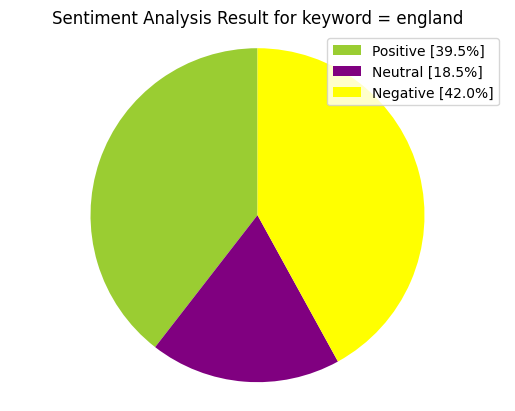

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'purple','yellow']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword = "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

,0
0,RT @lawseyitfc: England just lost the euro 202...
1,@Jdevine89 @GaryLineker @SteveAikenUUP @Englan...
2,RT @SirayahSK: I was in Trafalgar square the m...
3,RT @lawseyitfc: England just lost the euro 202...
4,RT @mihael_fitz: I know it's just a small mino...
...,...
195,RT @GaryLineker: Booing and racially abusing t...
196,@OnjaliRauf @Booktrust @MarcusRashford @Sancho...
197,#itsnotcominghome England zero tituli
198,@England @LukeShaw23 happy birthday


In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([-⁰9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @lawseyitfc: England just lost the euro 202...,2020 ...
1,@Jdevine89 @GaryLineker @SteveAikenUUP @Englan...,8 . / ...
2,RT @SirayahSK: I was in Trafalgar square the m...,....
4,RT @mihael_fitz: I know it's just a small mino...,' ( ...
5,@Alabamakid7 @ASpurri10 @JackGrealish English ...,7 10 ...
6,@Juliagoolia1982 @obiwan_thekobi @oshaymoishe1...,1 82 _ 1 ? ...
7,RT @AP: British Prime Minister Boris Johnson h...,...
8,@HarryMaguire93 @England @JackGrealish You guy...,3 2 ...
9,RT @Si_81: These boys stood up for us..\n\nLet...,..\n\n ' ...
10,@aayushcfc @England Already looking forward to...,2...


In [ ]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']

 if neg > pos:
   tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
   tw_list.loc[index, 'sentiment'] = "positive"
 else:
   tw_list.loc[index, 'sentiment'] = "neutral"
   tw_list.loc[index, 'neg'] = neg
   tw_list.loc[index, 'neu'] = neu
   tw_list.loc[index, 'pos'] = pos
   tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @lawseyitfc: England just lost the euro 202...,2020 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,@Jdevine89 @GaryLineker @SteveAikenUUP @Englan...,8 . / ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @SirayahSK: I was in Trafalgar square the m...,....,0.0,0.0,neutral,0.0,0.0,0.0,0.0
4,RT @mihael_fitz: I know it's just a small mino...,' ( ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
5,@Alabamakid7 @ASpurri10 @JackGrealish English ...,7 10 ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,@Juliagoolia1982 @obiwan_thekobi @oshaymoishe1...,1 82 _ 1 ? ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,RT @AP: British Prime Minister Boris Johnson h...,...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
8,@HarryMaguire93 @England @JackGrealish You guy...,3 2 ...,0.0,0.0,neutral,0.0,0.0,0.0,0.0
9,RT @Si_81: These boys stood up for us..\n\nLet...,..\n\n ' ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
10,@aayushcfc @England Already looking forward to...,2...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False) #
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2) #Return a Series containing counts of unique rows in the DataFrame.
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage']) #to concatenate total and percentage in the series

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,178,100.0


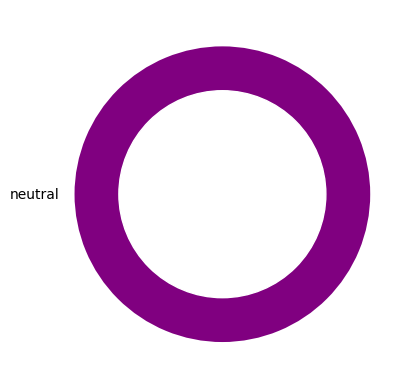

In [ ]:
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['purple', 'yellow' ,'yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()